### About the data

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem.The idea and dataset is taken from AnalyticsVidhya where the project is a part of a hackathon.

### Data Description
Variable	:                Definition

User_ID	:                    User ID

Product_ID :                 Product ID

Gender :                     Sex of User

Age	 :                       Age in bins

Occupation  :                Occupation (Masked)

City_Category  :             Category of the City (A,B,C)

Stay_In_Current_City_Years:	Number of years stay in current city

Marital_Status:	            Marital Status

Product_Category_1:	        Product Category (Masked)

Product_Category_2	:        Product may belongs to other category also (Masked)

Product_Category_3:	        Product may belongs to other category also (Masked)

Purchase	:                Purchase Amount (Target Variable)

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hpc\Data SC\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Import dataset

In [3]:
sales = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
#for submission

submission = pd.DataFrame()
submission['Purchase'] = []
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']

### Data exploration

In [6]:
sales.shape

(550068, 12)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables.

Looking into the summary statistics for these 7numercal features

In [8]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


There are 12 features, looking into each of these features:
    
1. User ID: Each user has been provided a unique ID. Lets see how many unique users we have in our dataset 

In [9]:
sales.User_ID.nunique()

5891

There are 5891 unique users in our dataset and none of the value in this feature is null

2. Product_ID: Each product that is available for sales has a specific/ unique product id associated with it. Lets look into the number of unique products available for sale.

In [10]:
sales.Product_ID.nunique()

3631

So there are a total of 3631 products available for sales.

3. Gender: Gender is a categorical variables with 2 categries: Male(M) and Female(F).

In [11]:
sales.Gender.value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are no null values in this feature and Males constitute 75% of the data.

4. Age: Age is again a categorical data with age divide in particular range.

In [12]:
sales.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

The age is divide in 7 categories i.e 0-17,18-25,26-35,36-45,46-50,51-55,55+ . The bins size here is varing.

5. Occupation: The Occupation number is the ID number of occupation type of each customer. We can see that around 21 different occupations exist.

In [13]:
sales.Occupation.nunique()

21

6. City_Category : The city has been categorised into 3 categories i.e A,B,C.

In [14]:
sales.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

7. Stay_In_Current_City_Years : This depects the numbers of year from which a person is residing in that particular city. It has been divided into 5 categories 

In [15]:
sales.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

8. Marital_Status: This features shows if a person is married or not.

In [16]:
sales.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

The products have been categorised into three categories with represent three different features:
    
9. Product_Category_1 
    
10. Product_Category_2 
    
11. Product_Category_3

12. Purchase: This is our final feature which is our dependent variables whose value we want to predict, the purchase amount. It is a contionous variable so this makes it a regression problem.

### Missing data

In [17]:
# lets combine the data for data prep

test['Purchase']=np.nan
sales['data']='train'
test['data']='test'
test=test[sales.columns]
combined=pd.concat([sales,test],axis=0)

In [18]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [19]:
sales.isna().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
data                               0
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

Here we can see that there are 2 features which contain the missing values i.e Product_Category_2 and Product_Category_3.

In [20]:
#percent of missing data relevant to all data
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False)
percent[[0,1]]

Product_Category_3    0.696727
Product_Category_2    0.315666
dtype: float64

The feature Product_Category_3 has 70% data missing so imputing this much data is not feasible , so it is better to drop this feature

In [21]:
combined.drop('Product_Category_3',axis=1,inplace=True)

The feature Product_Category_2 has 30% data missing so we can impute values into this using an appromiate method.

In [22]:
combined.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

These are almost 18 categories in which these Product_Category_2 is divided ,imputing the mean value does make sense because that gives a decimal term 9.8 which is not a product category here. So, there are 2 possible ways median or mode.

In [23]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = combined.Product_Category_2.value_counts(normalize = True)
miss = combined.Product_Category_2.isna()
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [24]:
combined.Product_Category_2.value_counts()

8.0     132861
14.0    114953
2.0     102326
16.0     90158
15.0     78870
5.0      54223
4.0      53604
6.0      34452
11.0     29365
17.0     27894
13.0     21935
9.0      11913
12.0     11432
10.0      6449
3.0       6052
18.0      5912
7.0       1268
Name: Product_Category_2, dtype: int64

In [25]:
combined.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
data                               0
dtype: int64

There are no null values left in the data set.The purchase null values are because of the test data that needs to be predicted

### Exploratory Data Analysis

In [26]:
#using the train data part from combined dataset for eda

sales_1 = combined[combined['data']=='train']

#### Univariate Analysis:

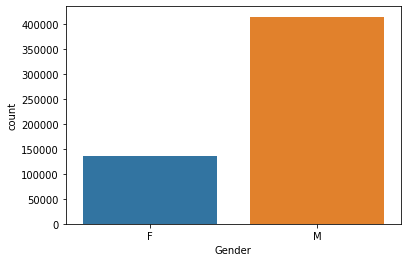

In [27]:
sns.countplot(sales_1['Gender'])
plt.show()

The graph shows that there are almost 3 times more male customers than female customers.

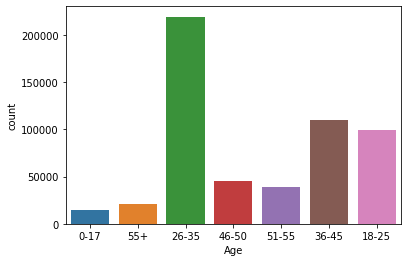

In [28]:
sns.countplot(sales_1['Age'])
plt.show()

The graph shows that the majority of the customers that purchase things during the sales season mainly belong to the age group of 26-35 and 36-45.

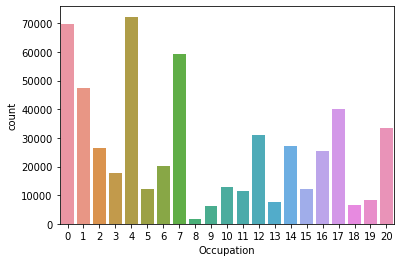

In [29]:
sns.countplot(sales_1['Occupation'])
plt.show()

The graph shows that top three Occupations with the majority of buyers is 4,0,7.

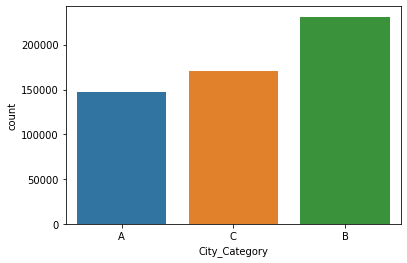

In [30]:
sns.countplot(sales_1['City_Category'])
plt.show()

The graph shows that people from city B buy majorly during the sale  

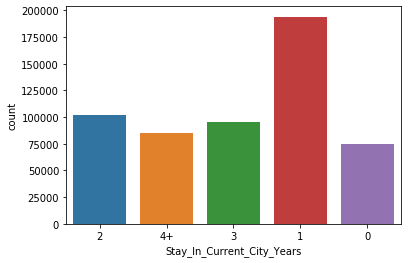

In [31]:
sns.countplot(sales_1['Stay_In_Current_City_Years'])
plt.show()

The graph shows that majority people buying during sales have lived in the current city for an year.

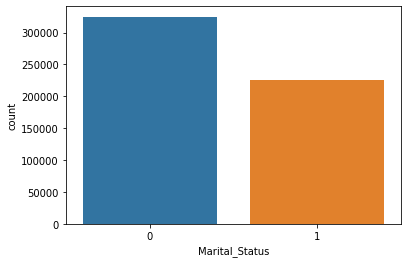

In [32]:
sns.countplot(sales_1['Marital_Status'])
plt.show()

The graphs shows that single people tend to buy more things during sales.

#### Bivariate Analysis / Multivariate Analysis:

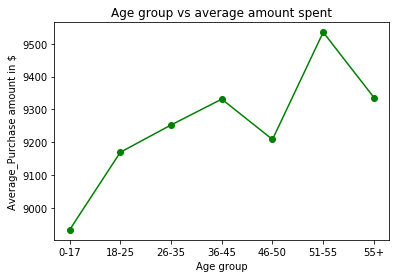

In [33]:
# Avearge amount spend by different age groups

data = sales_1.groupby('Age')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='g')
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');
plt.show()

The average amount spend by age group 51-55 is most during the festive season sales.

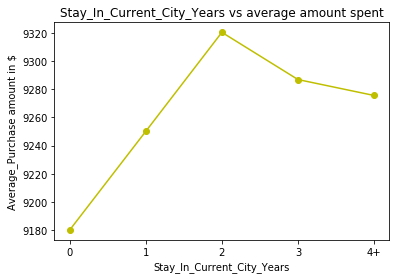

In [34]:
# Avearge amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

The people who have been living in the current city for 2 or more years are on an average spending more amount in the black friday sales

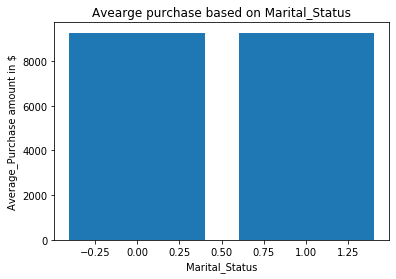

In [35]:
# Avearge purchase based on Marital_Status

data = sales_1.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()

Purchasers who married or not, have almost same average of purchase.

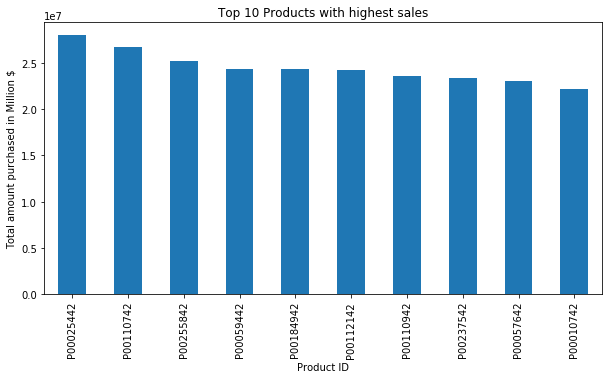

In [36]:
# Top 10 products which made the highest sales

data = sales_1.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

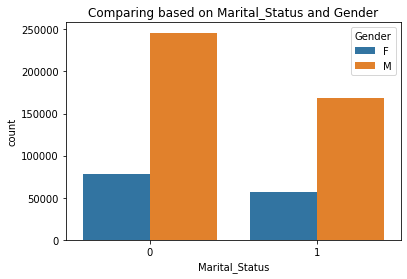

In [37]:
#comparing based on Marital_Status and Gender

sns.countplot(x='Marital_Status',data=sales_1,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average.

Products that are most purchased by each of the age group:

In [38]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

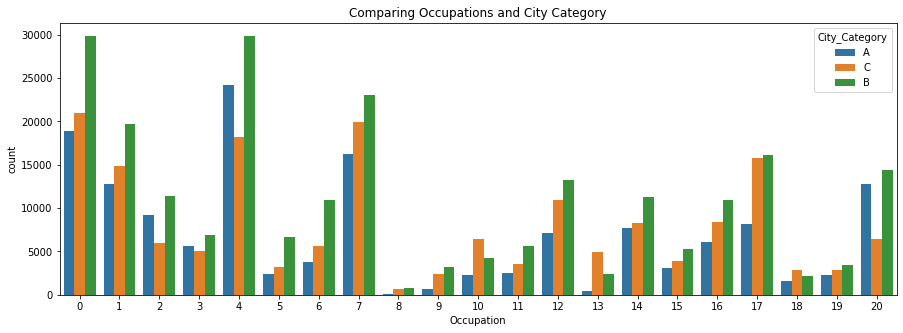

In [39]:
#Occupations and City Category

plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

People from Occupation 4,0,7 are buying the most and most of the people from these occupations belong to City_Category B.

C:\Users\Hpc\Data SC\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


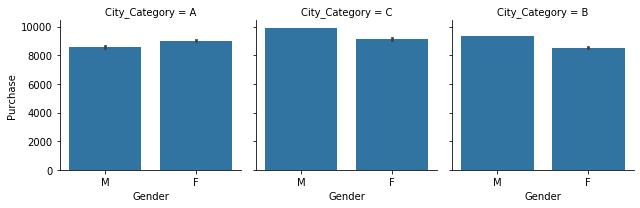

In [40]:
#the purchase habits of different genders across the different city categories.

g = sns.FacetGrid(sales_1,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men.

### Data preprocessing.

In [41]:
# for datapreprocessing again working with the combined dataset
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,3.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,7969.0,train


1. User_ID and Product_ID: 

In [42]:
# User_ID data preprocess. e.g. 1000002 -> 2

combined['User_ID'] = combined['User_ID'] - 1000000

# Product_ID preprocess e.g. P00069042 -> 69042

combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '')

#object to int
combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce')

In [43]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null int64
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Purchase                      550068 non-null float64
data                          783667 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


2. Product_Category_2 :

All the unique values in product category 2 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.

In [44]:
combined.Product_Category_2 = combined.Product_Category_2.astype('int64')

In [45]:
# features with datatype object

cat_cols = combined.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

3. Stay_In_Current_City_Years

For Stay in current city years we need to convert the object datatype to int.
It contains a category which has '4+' that needs to be altered.

In [46]:
# 4+ to 4
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years'])

#object to int
combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce')

4. Gender: 

    Gender 'F' for female are represented by the value fo 0.

    Gender 'M' for male are represented by the value fo 1.

In [47]:
combined['Gender'] = combined['Gender'].map({'F':0, 'M':1}).astype(int)

5. Age

In [48]:
# Modify age column

combined['Age'] = combined['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
combined['Age'].value_counts()

31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: Age, dtype: int64

6. City_Category : dummy variables for this feature

In [49]:
combined = pd.get_dummies(combined,columns=['City_Category'],drop_first = True)

In [50]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,3,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,8,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,8,7969.0,train,0,1


In [51]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null int64
Gender                        783667 non-null int32
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int64
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null int64
Purchase                      550068 non-null float64
data                          783667 non-null object
City_Category_B               783667 non-null uint8
City_Category_C               783667 non-null uint8
dtypes: float64(1), int32(1), int64(8), object(1), uint8(2)
memory usage: 70.3+ MB


In [52]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,3,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,8,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,8,7969.0,train,0,1


In [53]:
#splitting the data back into train and test as it was already provided

sales = combined[combined['data']=='train']
del sales['data']
test_input = combined[combined['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

C:\Users\Hpc\Data SC\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


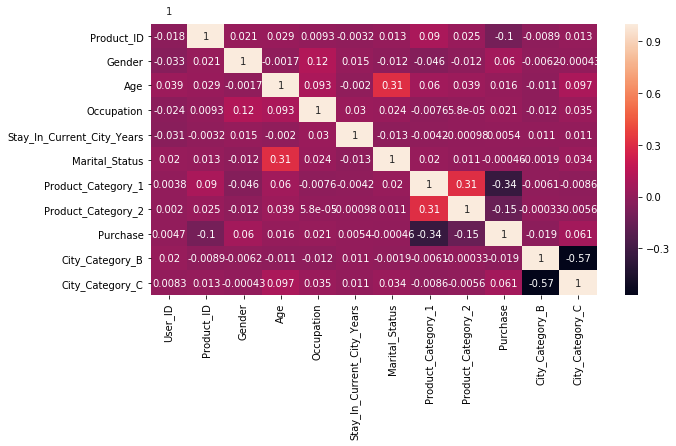

In [54]:
#Heatmap to show the correlation between various variables of the train data set

plt.figure(figsize=(10, 5))
cor = sales.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The variables which show a significant correlation in the data are:

1. Marital_status and Age
2. Product_Category_1 and Purchase
3. City_Category_B and City_category_A

### Model building

In [55]:
#splitting the data into X and y
X = sales.drop('Purchase',axis=1)
y = sales['Purchase']

#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

LinearRegression :
    
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



In [56]:
#Linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lr.coef_)
print('\n intercept:', lr.intercept_)

C:\Users\Hpc\Data SC\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


coefficients:
 [ 1.50008407e-02 -3.70678164e-03  5.35455992e+02  1.50055904e+01
  6.79302756e+00  1.24855136e+01 -6.01399597e+01 -4.10657744e+02
 -4.69058786e+01  1.80277096e+02  6.99418630e+02]

 intercept: 11268.549530270826


In [57]:
#Predicting on the test data

y_pred = lr.predict(X_test)

from sklearn import metrics

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.1319424532869915
rmse: 4685.778915376626


The score generated with the Linear Regression model was very low so used Regularized Linear model i.e Ridge Regression

Ridge Regression: This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression 

In [60]:
# Ridge Regression

from sklearn.linear_model import Ridge

RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train, y_train)

y_pred = RR.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

<IPython.core.display.Javascript object>

rmse: 4686.31691738428


Linear Regressiom models were not giving that much improvement so tried non linear regression models.

Decision Tree: 

In [70]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

<IPython.core.display.Javascript object>

rmse: 2738.1822905271515


In [67]:
#Decision Tree 2

DT2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

DT2.fit(X_train, y_train)

y_pred = DT2.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

<IPython.core.display.Javascript object>

rmse: 2885.1435041323025


Random Forest Regressor: 

Random Forest is an ensemble machine learning algorithm that follows the bagging technique. The base estimators in random forest are decision trees.It randomly selects a set of features which are used to decide the best split at each node of the decision tree.

In [ ]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [72]:
# another random forest

from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(random_state=3,max_depth=10,min_samples_split=500,oob_score=True)


rf3.fit(X_train,y_train)

y_pred = rf3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.6883150627739061


<IPython.core.display.Javascript object>

rmse: 2807.7952993232775


In [ ]:
# random forest 4

rf4 = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100,oob_score=True)


rf4.fit(X_train,y_train)

y_pred = rf4.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

ExtraTreesRegressor : 

The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).

In [ ]:
#Fitting the model
from sklearn.ensemble import ExtraTreesRegressor

rf = ExtraTreesRegressor()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

XG BRegressor :
    
XGBoost (extreme Gradient Boosting) is an advanced implementation of the gradient boosting algorithm. XGBoost has proved to be a highly effective ML algorithm, extensively used in machine learning competitions and hackathons. XGBoost has high predictive power and is almost 10 times faster than the other gradient boosting techniques. It also includes a variety of regularization which reduces overfitting and improves overall performance. Hence it is also known as ‘regularized boosting‘ technique.

In [ ]:
#XGBoost Model1
from xgboost import XGBRegressor


xgb1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

xgb1.fit(X_train,y_train)

y_pred = xgb1.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [58]:
## XGBoost2
from xgboost import XGBRegressor

xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X_train,y_train)

y_pred = xgb2.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7484808987919744
rmse: 2522.2784044430023


In [ ]:
## XGBoost3

xgb3 = XGBRegressor(n_estimators=6,max_depth=500)

xgb3.fit(X_train,y_train)

y_pred = xgb3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#XGBoost4

xgb4 = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb4.fit(X_train,y_train)

y_pred = xgb4.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#XGBoost5
from xgboost import XGBRegressor

xgb5 = XGBRegressor(n_estimators=450,max_depth=8,learning_rate=0.076)

xgb5.fit(X_train,y_train)

y_pred = xgb5.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#XGBoost6
from xgboost import XGBRegressor

xgb6 = XGBRegressor(n_estimators=470,max_depth=9,learning_rate=0.06)

xgb6.fit(X_train,y_train)

y_pred = xgb6.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Light GBM:

Light GBM beats all the other algorithms when the dataset is extremely large. Compared to the other algorithms, Light GBM takes lesser time to run on a huge dataset.LightGBM is a gradient boosting framework that uses tree-based algorithms and follows leaf-wise approach while other algorithms work in a level-wise approach pattern

In [61]:
from lightgbm import LGBMRegressor

lgbm1 = LGBMRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

lgbm1.fit(X_train,y_train)

y_pred = lgbm1.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7115773528102862
rmse: 2700.9852627204027


### Conclusion

Comparing all the models, we conclude that the XGBRegressor model is the best model to be able to predict purchase amount from our dataset.

Parameters and score: 

XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

r2_score: 0.7492767237638949

rmse: 2518.284905633662



In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head()

,Actual,Predicted
41001,15228.0,14161.526367
16151,1088.0,895.701355
507262,16426.0,17073.007812
368698,12042.0,17937.070312
353782,8699.0,7745.900391


In [60]:
# Feature Importance

imp = pd.DataFrame(xgb2.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
Product_Category_1,0.856904
Product_ID,0.026451
City_Category_C,0.024028
Product_Category_2,0.014492
User_ID,0.012769
Age,0.011511
Occupation,0.011299
City_Category_B,0.010879
Gender,0.010728
Stay_In_Current_City_Years,0.010661


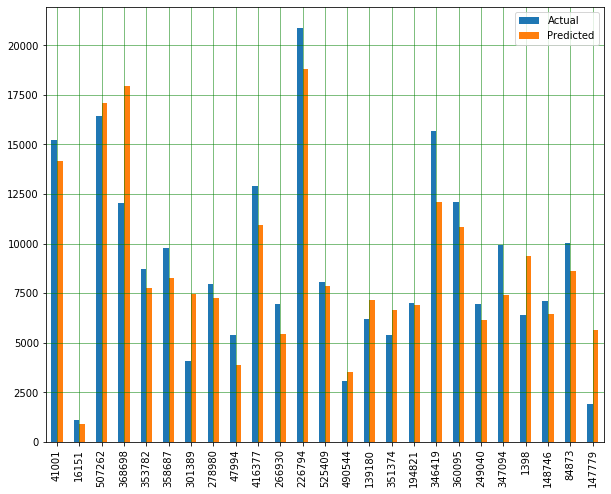

In [67]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

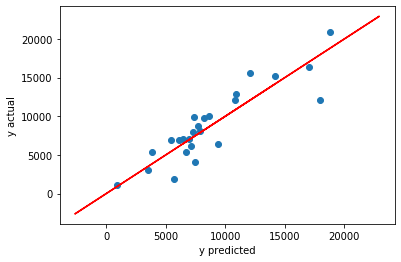

In [68]:
plt.scatter(df1.Predicted,df1.Actual)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()